In [1]:
import os
import rospy
import numpy
import json
import pandas
from geometry_msgs.msg import WrenchStamped

In [2]:
SAVE_PATH = os.getcwd()

In [3]:
def ft_callback(data):
    global ft_values
    ft_values = numpy.array([data.wrench.force.x, data.wrench.force.y, data.wrench.force.z, data.wrench.torque.x, data.wrench.torque.y, data.wrench.torque.z])  

In [4]:
rospy.init_node("FT300", anonymous=True)
rospy.Subscriber("/ft300_force_torque", WrenchStamped, ft_callback)
rate = rospy.Rate(100)

In [5]:
Fxs = list()
Fys = list()
Fzs = list()
Mxs = list()
Mys = list()
Mzs = list()

In [6]:
for i in range(100*60):
    Fxs.append(ft_values[0])
    Fys.append(ft_values[1])
    Fzs.append(ft_values[2])
    Mxs.append(ft_values[3])
    Mys.append(ft_values[4])
    Mzs.append(ft_values[5])
    rate.sleep()

In [7]:
save_dict = {
    "Fx"  : Fxs,
    "Fy"  : Fzs,
    "Fz"  : Fys,
    "Mx"  : Mxs,
    "My"  : Mys,
    "Mz"  : Mzs,
}
filename = "FT_EVALUATION_2.json"
with open(os.path.join(*[SAVE_PATH, filename]), 'w') as file:
    json.dump(save_dict, file)
    file.close()

In [8]:
import matplotlib.pyplot as plt

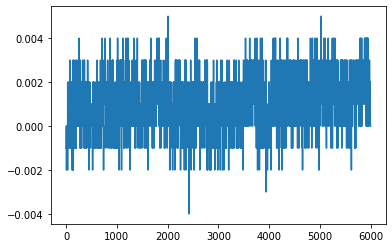

In [12]:
plt.plot(Mzs)